# TD1  : GLM pour données de comptages

Nous n'aurons pas le temps de voir la procédure *classique* pour réaliser des boostraps sous R. Cependant de nombreuses ressources existent sur internet, et au besoin, vous pouvez par exemple consulter ces tutoriels [1](https://www.statology.org/bootstrapping-in-r/) et [2](https://bookdown.org/jgscott/DSGI/the-bootstrap.html#bootstrapping-usually-but-not-always-works).

Pour ce TD et le suivant, nous allons analyser des données provenant, de cette [étude](https://doi.org/10.1289/EHP4898), qui visait à tester et caractériser le lien entre la température ambiante et la propension au Suicide.

Nous allons travailler sur une version simplifiée de leur jeu de données.

1. Chargez les données et utilisez une régression linéaire simple pour tester s'il y a un lien entre le nombre de Suicides et la température ambiante.

In [4]:
options(stringsAsFactors = F)
library(DHARMa) # fonctions : simulateResiduals, testDispersion
# vignette("DHARMa")
library(ggplot2)

ToHot = read.csv('./Data/Suicides and Ambient Temperature.csv')
head(ToHot)

Country Location       Suicides Temperature
1 Brazil  Belo Horizonte 843      22.0       
2 Brazil  Brasilia       622      21.3       
3 Brazil  Campo Grande   266      25.8       
4 Brazil  Curitiba       635      17.6       
5 Brazil  Fortaleza      886      27.0       
6 Brazil  Maceio         169      24.9

Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


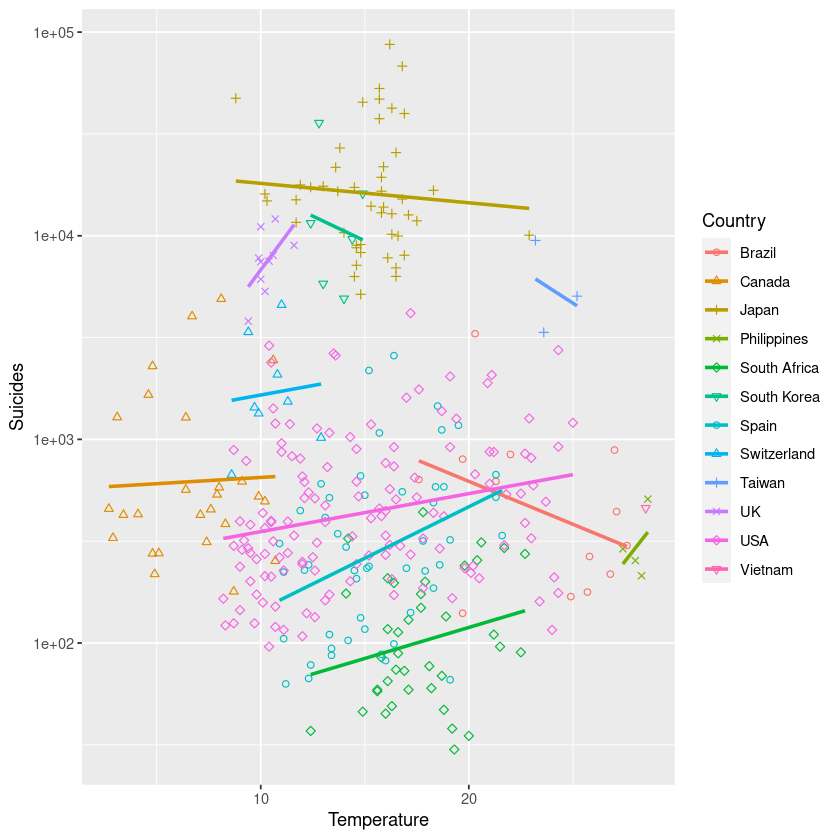

In [5]:
ylim = c(min(ToHot$Suicides), max(ToHot$Suicides))

ggplot(ToHot,aes(y = Suicides, x = Temperature, color=Country, shape=Country)) + 
  geom_point() + 
  scale_y_log10(limits = ylim) +
  scale_shape_manual(values = rep(1:6, len = 12)) +
  geom_smooth(method = "lm", fill = NA, formula = 'y ~ x')

# plot(ToHot$Suicides ~ ToHot$Temperature,col = as.numeric(as.factor(ToHot$Country)), log="y", pch=19)

Pour certains pays, la tendance *semble* un peu quadratique (canada, USA). Pour l'étudier, on va créer une variable, `Temperature2` contenant le carré des températures :

Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in qt((1 - level)/2, df):
“NaNs produced”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


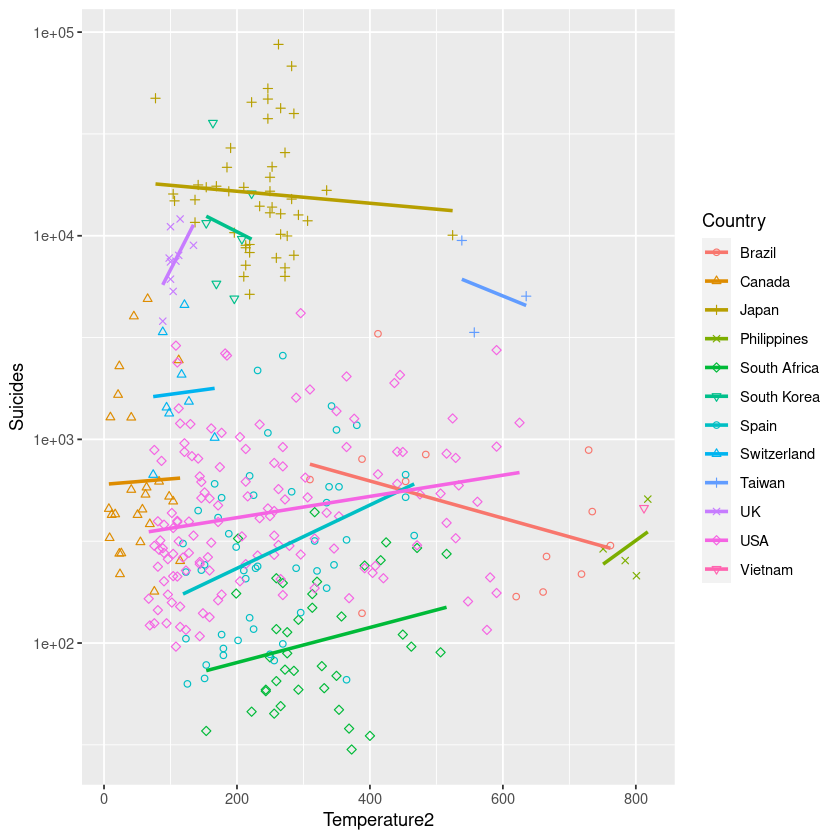

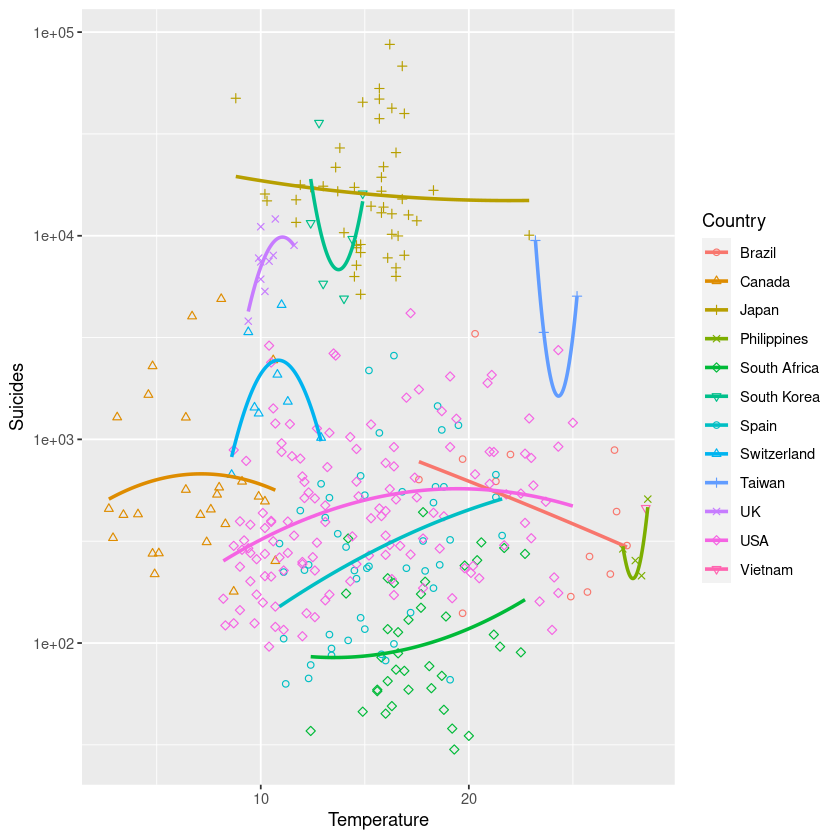

In [6]:
ToHot$Temperature2 = ToHot$Temperature^2

ggplot(ToHot,aes(y = Suicides, x = Temperature2, color=Country, shape=Country)) + 
  geom_point() + 
  scale_y_log10(limits = ylim) +
  scale_shape_manual(values = rep(1:6, len = 12)) +
  geom_smooth(method = "lm", fill = NA, formula = 'y ~ x')
# plot(ToHot$Suicides ~ ToHot$Temperature2,col = as.numeric(as.factor(ToHot$Country)), log="y", pch=19)

ggplot(ToHot,aes(y = Suicides, x = Temperature, color=Country, shape=Country)) + 
  geom_point() + 
  scale_y_log10(limits = ylim) +
  scale_shape_manual(values = rep(1:6, len = 12)) +
  geom_smooth(method = "lm", fill = NA, formula = 'y ~ x + I(x^2)')


 2a) Utilisez la variable `Temperature` pour ajuster un modèle linéaire simple à la variable `Suicides` $-$ qu'il faudra éventuellement transformer. </br>
 2b) Utilisez les variables `Temperature` et `Temperature2` pour ajuster un modèle linéaire quadratique à la variable `Suicides` $-$ qu'il faudra éventuellement transformer.

In [244]:
# 2. a) 
Mnorm  = lm( ............

In [245]:
# 2. a) 


In [246]:
# 2. a) 


In [247]:
# 2. a) 


## Pour plus tard <a id='later'></a>

<!----
# later
# formula(Mlognorm)
# print(anova(lm(Suicides ~ Country + Temperature , data = ToHot)))
# later

# back to 
# Terms added sequentially (first to last)
---->

[go to 'Terms added sequentially'](#Terms_added_sequentially)
## FIN de $-$ Pour plus tard <a id='later'></a>

In [248]:
# 2. b) 
# Testons un modèle log normal QUADRATIQUE :




In [249]:
# 2. b) 


2. c) </br>
Entre les 2 modèles, `Mlognorm` et `Mlognorm2`, lequel est le meilleur ? </br>
Autrement dit, lequel prédirait le mieux des données qu'il n'a jamais vu ? </br>
Ou encore, dans le cadre d'une [validation croisée](https://fr.wikipedia.org/wiki/Validation_crois%C3%A9e), lequel aurait le moins d'erreur de prédiction pour les données tests ? 

Le [Critère d'information d'Akaike](https://fr.wikipedia.org/wiki/Crit%C3%A8re_d%27information_d%27Akaike) (AIC) vise précisément à répondre à cette question.

In [250]:
# 2. c) 


Le modèle `Mlognorm2` est légèrement meilleur, mais cette différence est marginale. Nous nous concentrerons sur la forme quadratique dans la suite du TD.

> Petit aparté, si la transformation log n'avait pas fonctionné, nous aurions alors testé la transformation `boxcox` avec le code suivant :
```
### boxcox models ----
#' Start with the modèle with no transformation (`Mnorm`) and
#' compute the log likelihood for many values of lambda. This is implemented by the function `boxcox` from the `MASS` R package
bc <- MASS::boxcox(Mnorm,lambda=seq(-2,2,length=200))

# Select the best value of lambda
lambda = bc$x[which.max(bc$y)]

# Implement the transformation
z <- (ToHot$Suicides^lambda-1)/lambda

# Run the modèle on the transformed variable
Mboxcox_norm  = lm(z ~ Temperature + Temperature2 + Country ,   data = ToHot)

# Analyse the modèle as usually.
```

3a) Construisez un GLM Poisson analogue du modèle Mlognorm2 </br>
3b) Regardez la significativité i) des variables via des [tests de ratio de vraisemblance]() et ii) des coefficients </br>
3c) Bootstraper les coefficients
3c) Bootstraper les coefficients

In [251]:
###                  GLM Poisson ----- 
#'                     |                
#'                     |                 
#' ~~~~~~~~~~~~~~~~~~~~|~~~~~~~~~~~~~~~~~~~~~~~
#'                     |           
#'                     |           
#'                     |           
#'        ><(((°>      |      <°)))>< 
#'          ><(((°>    ¿    <°)))><  
#'        ><(((°>             <°)))>< 
#'                                           ><(((°>    
#'
#'
#'____;____(/_______§_______?___µ___\|/______\)_____

# 3a) 


In [252]:
# 3b) i)significativité des variables via des tests de ratio de vraisemblance


In [254]:
# 3b) ii)significativité des coefficients


In [255]:
# 3c) Bootstraper les coefficients (ça peut être un peu long à exécuter)
 


4. Testons différentes façons de prendre en compte la surdispersion </br>
   a) via un GLM quasiPossion </br>
   b) via un GLM negative binomial

In [256]:
# 4a)
### GLM quasipoisson -----
Mquasipoisson = 

In [ ]:
plot( simulateResiduals(Mquasipoisson) )

mais ceci aurait donné le même résultat que `plot( simulateResiduals(Mpoisson) )` car la méthode quasi ajuste seulement les *p*.values et les erreurs standard des coefficients.

### <span style="color:red"> Terms added sequentially </span> ??!<a id='Terms_added_sequentially'></a>
[go to 'later'](#later)

<span style="font-size: 30px"> <span style="color:red"> >>>> </span> [Un lien sur les décompositions de type I, II et III](https://md.psych.bio.uni-goettingen.de/mv/unit/lm_cat/lm_cat_unbal_ss_explained.html) <span style="color:red"> <<<< </span>
 </span>

In [257]:
# 4a)


In [258]:
# 4b) ### GLM negative binomial -----

Mnb = MASS::glm.nb( ......

Nous avons donc 2 modèles qui sont censés gérer correctement la surdispersion, mais qui sont en complet désaccord sur l'effet de la température…

Solutions :
* ~On choisit le modèle qui nous arrange.~ (un exemple de P-hacking ([1](https://en.wikipedia.org/wiki/Data_dredging) et [2](https://doi.org/10.1186/s12903-016-0208-x)) très très classique… ; aussi appelé 'data-dredging')
* ~On compare l'AIC~ : cela reviendrait à comparer une vraisemblance et une quasi-vraisemblance
* Réaliser une réelle [validation croisée](https://cran.r-project.org/web/packages/cv/vignettes/cv.html)…
* **Comparer la relation moyenne-variance suposée par les modèles à la relation observée (empirique)**

In [ ]:
# Empirical mean - variance relationship :
Yhat = predict(Mlognorm2)
Q = quantile(Yhat, seq(0,1,length = round(nrow(ToHot)/3)))
ToHot$grp = 1
for(q in Q[-1]){
  ToHot$grp[Yhat > q] = max(ToHot$grp)+1
}
boxplot(Suicides ~ grp, data = ToHot,log="y")


In [ ]:

table(ToHot$grp)
EmpiricalMean_Variance = as.data.frame(t(sapply(unique(ToHot$grp), function(g){
  w=which(ToHot$grp==g)
  c('mean' = mean(ToHot$Suicides[w]), 'var' = var(ToHot$Suicides[w]))
  })))
head(EmpiricalMean_Variance)
plot(EmpiricalMean_Variance)
plot(EmpiricalMean_Variance,log='xy')


In [ ]:
plot(EmpiricalMean_Variance,log='xy')
Mnb$theta # https://stats.stackexchange.com/questions/460040/what-is-theta-in-negative-binomial-distribution
µ   = seq(min(EmpiricalMean_Variance$mean,na.rm = T), max(EmpiricalMean_Variance$mean,na.rm = T), length = 10000)
# points(log(µ),log(Var),type='l')
abline(0,1, lwd = 1.5) # poisson
# points(µ , µ*testDispersion(Mpoisson, plot = F)$statistic , type ='l', col='darkgreen', lwd = 1.5) # quasipoisson
points(µ , µ*testDispersion(Mpoisson, plot = F,type = 'PearsonChisq')$statistic , type ='l', col='darkgreen', lwd = 1.5) # quasipoisson
points(µ , µ+(µ^2)/Mnb$theta , type='l', col='darkred', lwd = 1.5) # negative binomial
legend(x = 'topleft',legend = c("Poisson (var = mean)"
                               ,"Quasi-Poisson (var = mean x Dispersion)"
                               ,"Negative binomial (var = mean+(mean^2)/theta)"), col=c('black', "darkgreen", "darkred"), text.col = c('black', "darkgreen", "darkred"), lwd = 1.5)

$\Rightarrow$ **Pour ce jeu de donnée** le modèle négative binomial est bien meilleur. </br>
(Pour plus d'information sur ces 2 types de modèles, voir [lien](https://www.utstat.utoronto.ca/reid/sta2201s/QUASI-POISSON.pdf)) </br>
Visualisons les prédictions du modèle :

In [ ]:
ToHot$Predictions = predict(Mnb, type='respons')

ggplot(ToHot,aes(y = Suicides, x = Temperature, color=Country, shape=Country)) + 
  geom_point() + 
  scale_y_log10(limits = ylim) +
  scale_shape_manual(values = rep(1:6, len = 12)) + 
  geom_line(aes(y=Predictions))

